<a href="https://colab.research.google.com/github/bachhvu/Understanding-RNN-and-LSTM/blob/main/LSTM_Blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
One of the most prominent machine learning methods, recurrent neural networks surpass other algorithms in both accuracy and speed. As a result, it is important to have a thorough grasp of what a Neural Network is, how it is constructed, and what its reach and limitations are.










# **Recurrent Neural Network**
Taking stock market data for a specific stock as an example of sequential data. Machine learning model can base on many characteristics such as the open, high, low, close values and volume of trades each day to learn to predict stock prices. Although the stock price depends on these characteristics, it is also largely depending on the stock value of the previous few days. In fact, for traders, the value (or the trend) of these previous days is an important determinant of prediction. 
Recurrent neural networks can solve this problem. They are neural networks with loops that allow information to persist. RNN processes the input sequentially, where the context of the previous input is considered when calculating the output of the current step. This allows the neural network to carry information in different time steps instead of keeping all inputs independent of each other.
 
 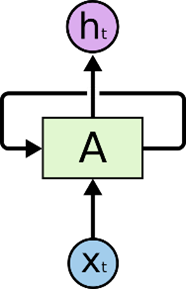

Figure 1. RNN architecture

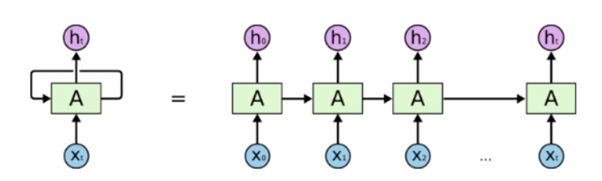

Figure 2. Unrolled RNN architecture

During processing, the RNN passes the hidden state from before to the next step in the sequence. The hidden state acts as the memory of the neural network and saves information on previous data previously viewed by the network. The input at a time-step and the hidden state from the previous time step are combined to form a vector. The vector is passed through a tanh activation function to obtain the output of a new hidden state.

### **Limitations**
Recurrent neural networks are affected by short-term memory. If the sequence is long enough, it will be difficult for them to pass information from the previous steps to the later steps. Therefore, if you try to process a piece of text to make predictions, the RNN may miss important information early on. An example of this problem would be in the Natural Language Processing topic. Consider having a network that generating the next word based on the previous ones. If we are trying to predict the last word in the text “I grew up in the United Kingdom. I speak fluent _____”. The latter sentence structure indicates that the next word might be the name of a language. However, in order to know exactly what the language is, the context of ‘the United Kingdom” from the former sentence is required. In a real scenario, it is feasible for the distance between the relevant data and the point at which it is required to grow significantly. RNNs become unable to learn to connect the information as that gap widens.



In neural network, the gradient is the value used to update the weight. Due to the chain rule, the gradients must go through continuous matrix multiplications during the back-propagation process, making it to either diminish exponentially (vanish) or increase exponentially (explode). For activation functions like the sigmoid function, as we move to the initial layer, the gradient will multiply many times. Therefore, when we go to the initial layer, the gradient becomes too small, and it is difficult to train these layers because the parameter updates become insignificant. This makes the learning of long data sequences difficult. Thus, RNNs suffer from short-term memory as a result of these difficulties, as they are unable to remember what it seen in longer sequences and hold on to long-term dependencies. Thankfully, this problem can be solved by using a modified version of RNNs – the Long Short-Term Memory Networks. 

# **Long Short-Term Memory (LSTM)**
Long Short-Term Memory Networks are a kinds of RNN and has a similar flow as a recurrent neural network. They were introduced by Hochreiter & Schmidhuber (1997). It is an upgrade to resolve RNN learning failure when there are more than 5-10 discrete time steps between the relevant input event and the target signal in past observations (vanishing/exploding gradient problem). The key to LSTMs is by introducing a memory unit called "cell state".  At each time step, the LSTM unit obtains 3 different pieces of information: the current input data, the short-term memory (hidden state) of the previous unit (similar to the hidden state in RNN), and finally the long-term memory (cell state).
 
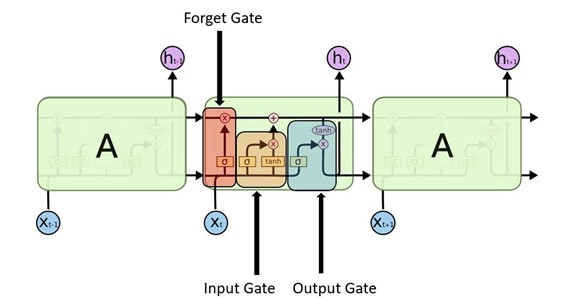

Figure 3. LSTM architecture

Short Term and Long-Term Memory cells are like mini neural networks designed to enable memory in larger neural networks. This is achieved through the use of recurrent nodes in the LSTM cell. The node has an edge looping back with a weight of 1, which means that in each iteration of feedforward, the cell can retain information from the previous step and all previous steps. Since the weight of the looping connection is 1, the old memory will not disappear over time like in traditional RNN.



LSTM has 3 gates, to regulate the information flow in an LSTM cell.

The forget gate decides to keep or discard information from the long-term memory based on current input and previous hidden states. This is done through the sigmoid activation function. This function only returns 0 and 1 for input. Once multiplied by something, it either drop (multiplied by zero results in zero) or passes completely (multiplied by 1 results in the same value)
 
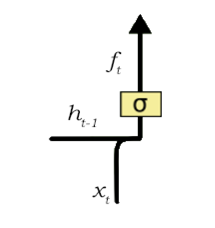

Figure 4. Forget Gate

The input gate decides what new information to store in the long-term memory. At this point, the previous hidden state and the current input is passed into a sigmoid function, which determines the values need to be updated by converting it between 0 and 1. This is very similar to the forget gate and can removes any unwanted information from the current input. The hidden state and current input are also passed into the tanh activation function to compress the value to always be between -1 and 1 which help regulating the network. Next, the output from tanh and sigmoid are then multiplied, and the results represents the information that will be retained in long-term memory. Finally, this output will be added to the cell state to update it.

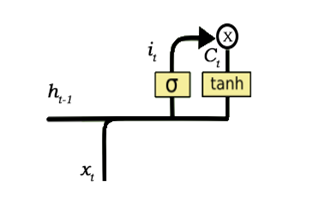

Figure 5. Input Gate

The output gate decides what the next hidden state should be. The current input and hidden state will be passed through a sigmoid function. Then, the cell state is put through a tanh activation function. The output from these two processed is multiplied to produce the new hidden state for the next time step.
 
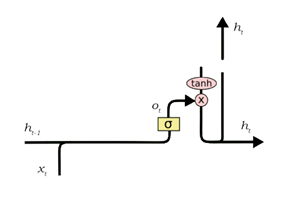

Figure 6. Output Gate

## **Variant**
The RNNs and LSTMs architecture stated above are only capable of capturing the dependencies in only one direction. This poses a challenge when performing tasks such as machine translation, where we also need context from words we haven’t seen yet. This results in bidirectional RNNs and LSTMs, which is a variant of RNN and LSTM that works in both ways. Bidirectional LSTM is frequently seen in papers and application because to its utility in grasping the context. 

# LSTM Implmentation



Let’s do a practical implementation to predict the prices of stocks using the “Google stock price” data and LSTM.

Import the required libraries and data.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

df=pd.read_csv("GOOG.csv")
print(df.shape)
df.head(5)

(1258, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-28,678.969971,680.330017,673.000000,680.039978,680.039978,2173800
1,2016-06-29,683.000000,687.429016,681.409973,684.109985,684.109985,1932600
2,2016-06-30,685.469971,692.320007,683.650024,692.099976,692.099976,1597700
3,2016-07-01,692.200012,700.650024,692.130005,699.210022,699.210022,1344700
4,2016-07-05,696.059998,696.940002,688.880005,694.950012,694.950012,1462600


The next step is to split the data into training and testing sets. The target value that is going to be predicted is the Open stock price value

In [74]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

LSTM is sensitive to the scale of data, so we scale it. LSTMs expect our data to be in a specific format, usually a 3D array. We start by creating data in 60 timesteps and converting it into an array using NumPy. Next, we convert the data into a 3D dimension array with X_train samples, 60 timestamps, and one feature at each step.

In [76]:
# Feature Scaling
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Now we build the model. We will be using sequential model with 50 neurons, 4 layers and some dropout regularlization to avoid overfitting. Thereafter, a single neuron is assigned to the output layer. We then compile the model using adam stochastic gradient descent optimizer and set the loss as mean squared errors. Finally, we fit the model to run on 100 epochs with a batch size of 32.

In [77]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 10s 117ms/step - loss: 0.3652
Epoch 2/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0943
Epoch 3/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0763
Epoch 4/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0813
Epoch 5/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0669
Epoch 6/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0716
Epoch 7/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0650
Epoch 8/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0589
Epoch 9/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0594
Epoch 10/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0615
Epoch 11/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0565
Epoch 12/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0533
Epoch 13/100

Getting the predicted stock price


In [255]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(dataset_test)+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(458, 60, 1)


Visualize the results of predicted and real stock price

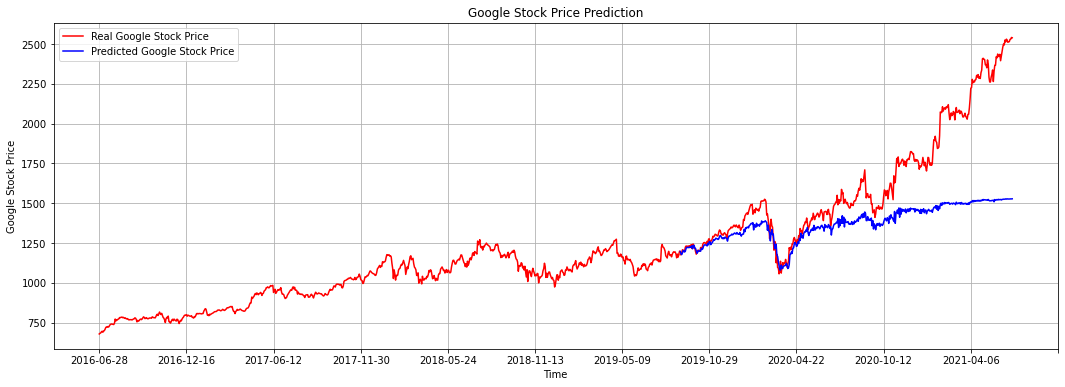

In [258]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Visualising the results
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(df.loc[:799, 'Date'], dataset_train.values, color = 'red')
ax.plot(df.loc[800:, 'Date'], dataset_test.values, color = 'red', label = 'Real Google Stock Price')
ax.plot(df.loc[800:, 'Date'], predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
ax.set_xticks(range(0,1400,120))
ax.set_title('Google Stock Price Prediction')
ax.set_xlabel('Time')
ax.set_ylabel('Google Stock Price')
ax.legend()
ax.grid()
plt.show()

We can see from the plot that the model perform well. It is able to predict the fall in April due to the Covid-19 lockdown, as well the recovery of price afterwards. For the most recent timestamp, the model predicts the price that is lower compared to the real values of the stock price.

# **Conclusion**
In summary, RNNs are good at processing sequential data, but they have a short-term memory problem. LSTMs were developed as a way to reduce short-term memory by employing a long-term memory unit called “cell state”. They have been applied successfully to a variety of applications such as speech recognition, speech synthesis, language modeling, translation, image captioning. It is demonstrated by the stock price prediction

# **References**
Hochreiter, S. & Schimidhuber, J., 1997. Long Short_term Memory. Neural Computation, 9(8).